0.00770038255328288


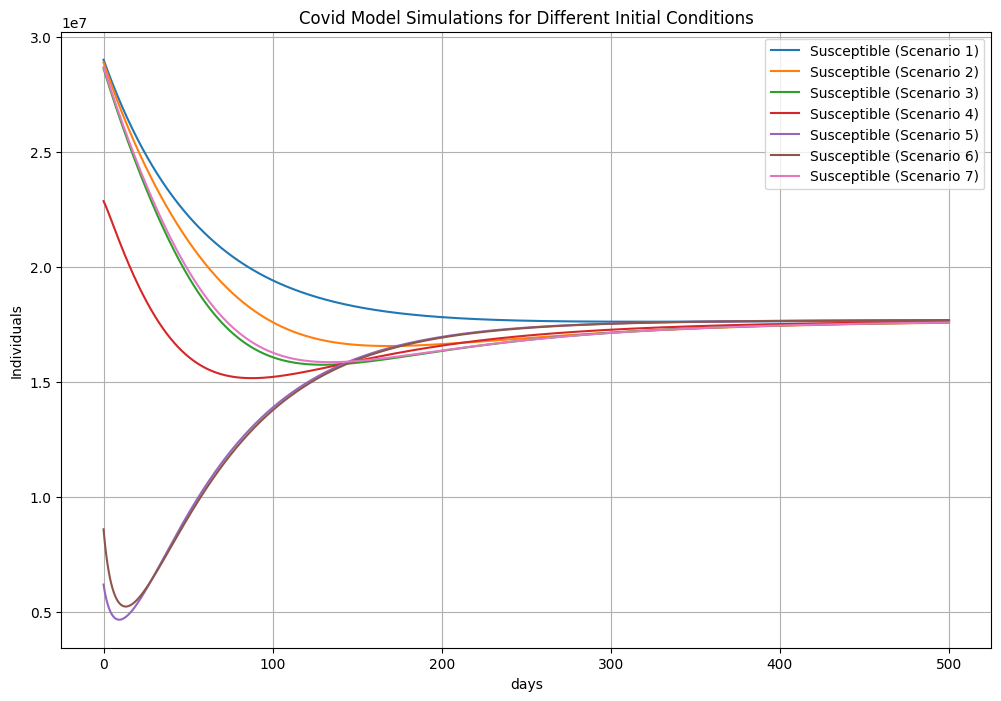

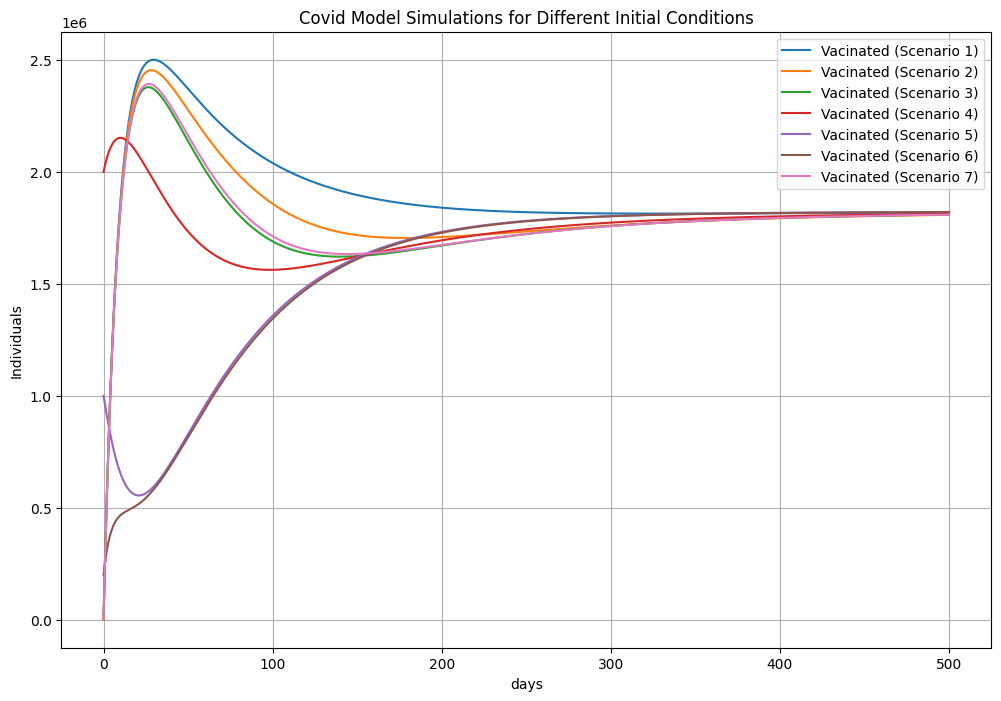

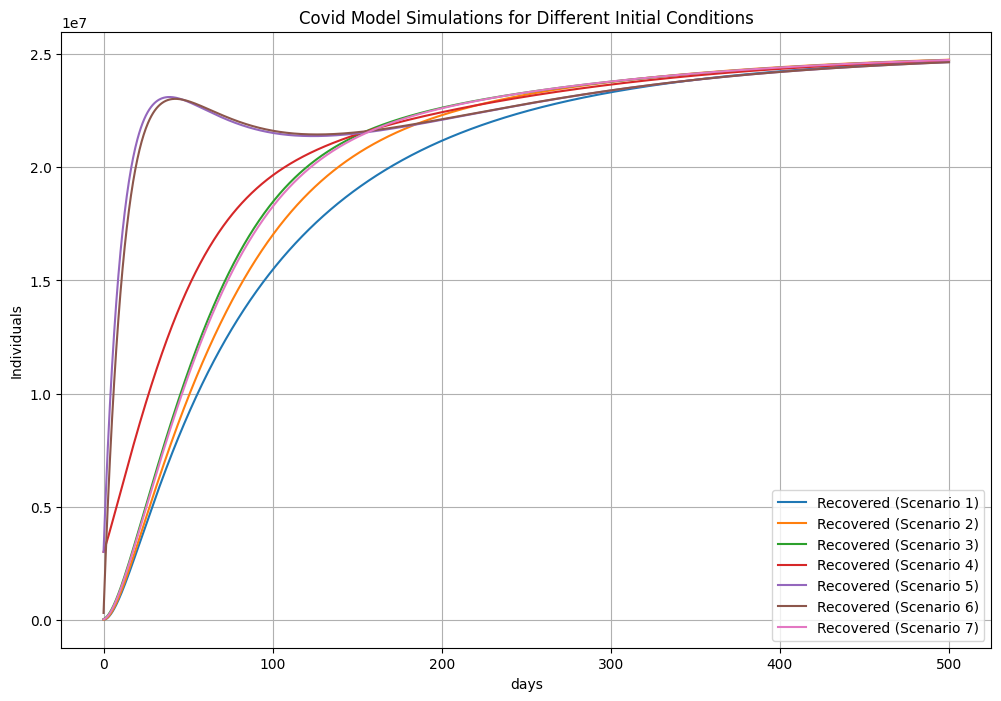

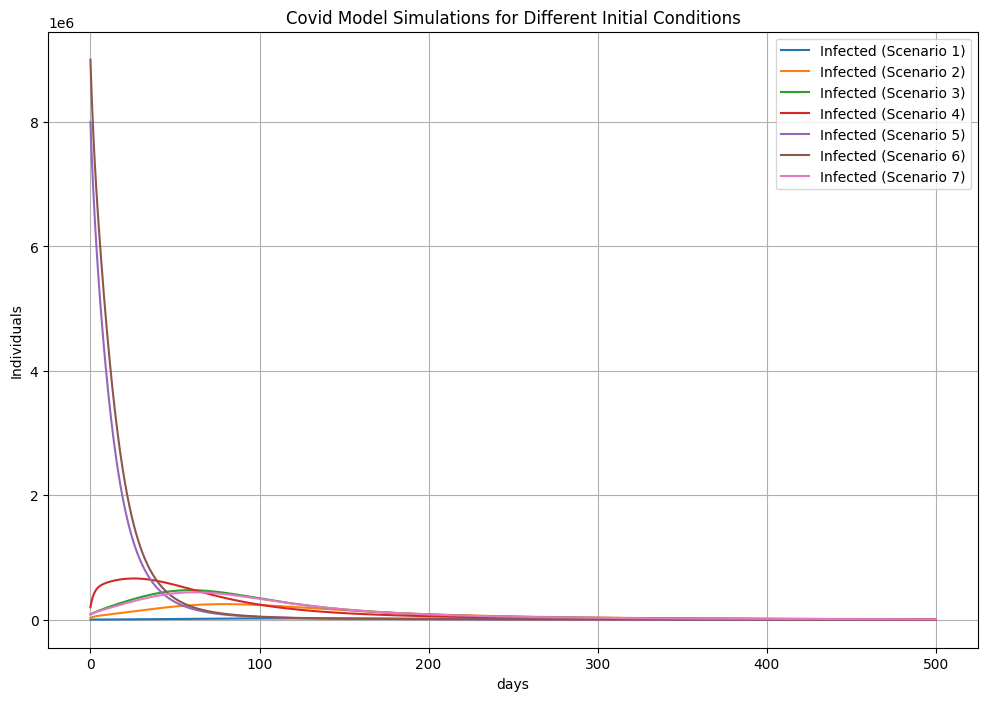

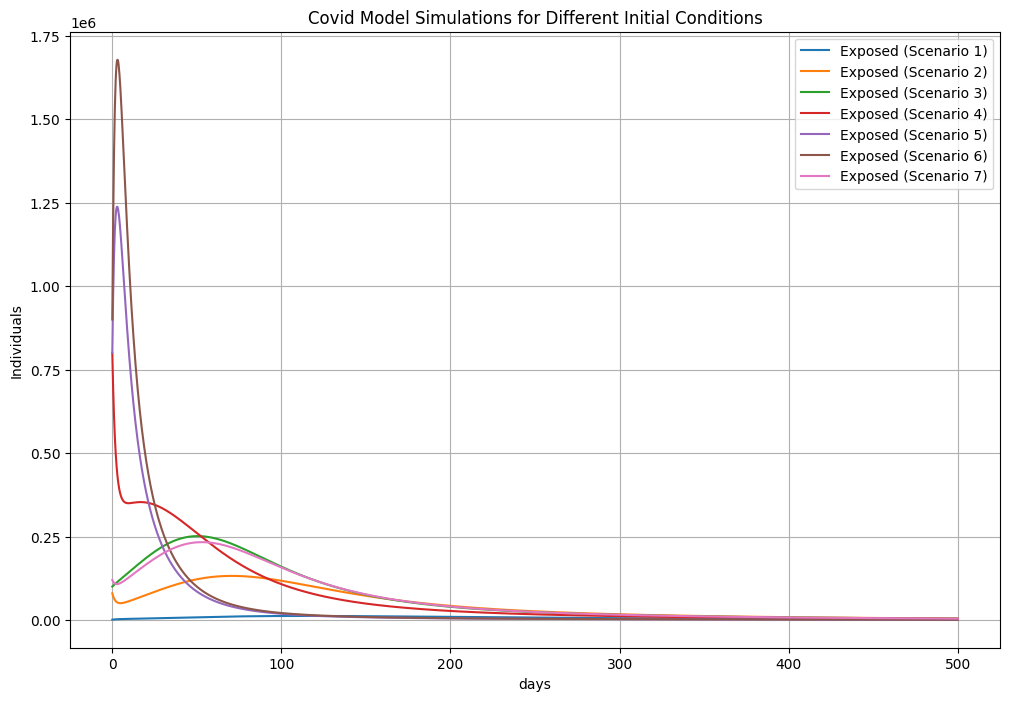

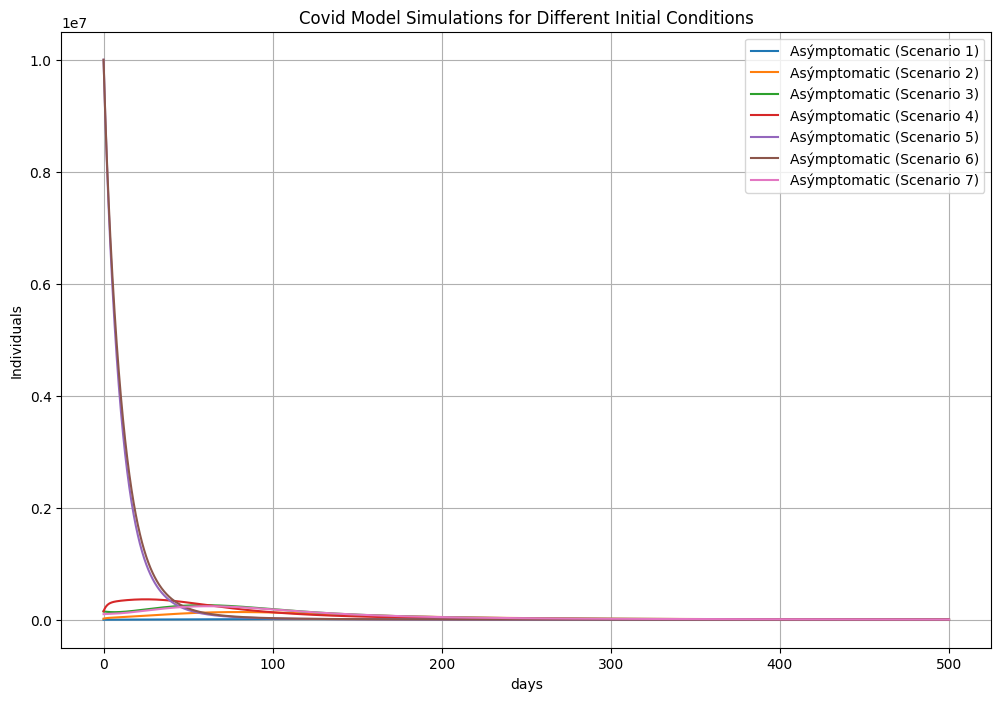

17709510.72896565
1823481.4091227443
25069916.139316525


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# The model differential equations
def vac_model(y, t, gamma_I, gamma_A, alpha, gamma_VI, gamma_VA, nu, bi, beta, phi, sigma, mu, mu_c, lambda_I, lambda_A, N, theta):
    S, E, I, A, V, R = y
    dSdt =theta - gamma_I * S * I - gamma_A * S * A - nu * bi * S - mu*S
    dEdt = gamma_I * S * I + gamma_A * S * A + gamma_VI * V * I + gamma_VA * V * A  - beta * E - mu*E
    dIdt = (1 - sigma) * beta * E - mu_c * I - lambda_I * I - mu*I
    dAdt = sigma * beta * E - lambda_A * A - mu*A
    dVdt = nu * bi * S -gamma_VI * V * I - gamma_VA * V * A - phi * V - mu * V
    dRdt = lambda_A * A + lambda_I * I + phi * V - mu*R
    return [dSdt, dEdt, dIdt, dAdt, dVdt, dRdt]

#Parameters
gamma_I = 0.000045 / 6500
gamma_A = 0.8*gamma_I
alpha = 0.92
gamma_VI = (1-alpha)*gamma_I
gamma_VA = (1-alpha)*gamma_A
nu = 0.00982 * 2
bi = 0.553
beta = 1 / 2.8
phi = 1 / 10.17
sigma = 0.35
mu = 0.007152
mu_c = 0.00189
lambda_I = 1 / 9
lambda_A = 1 / 9
N = 2.9 * 10**7
theta = 0.011*N

denS = mu + bi*nu
denE = beta + mu
denI = lambda_I + mu + mu_c
denA = lambda_A + mu
denV = mu + phi

den1 = denE*denI*denS*denV
den2 = denE*denI*denV
den3 = denE*denA*denS*denV
den4 = denE*denA*denV

Ro1 = (1-sigma)*bi*nu*beta*(gamma_VI*theta/den1 + gamma_I/den2)
Ro2 = sigma*bi*nu*beta*(gamma_VA*theta/den3 + gamma_I/den4)
Ro = Ro1 + Ro2
print(Ro)

#different initial conditions
# Scenario 1
E1= 1000
I1=5000
A1= 1000
V1= 100
R1= 50
S1= N - (E1 + I1 + A1 + V1 + R1)
# Scenario 2
E2= 80000
I2=30000
A2= 20000
V2= 100
R2= 200
S2= N - (E2 + I2 + A2 + V2 + R2)
# Scenario 3
E3= 100000
I3=90000
A3= 150000
V3= 20000
R3= 30000
S3= N - (E3 + I3 + A3 + V3 + R3)
# Scenario 4
E4= 800000
I4=200000
A4= 150000
V4= 2000000
R4= 3000000
S4= N - (E4 + I4 + A4 + V4 + R4)

# Scenario 5
E5= 800000
I5=8000000
A5= 10000000
V5= 1000000
R5= 3000000
S5= N - (E5 + I5 + A5 + V5 + R5)

# Scenario 6
E6= 900000
I6=9000000
A6= 10000000
V6= 200000
R6= 300000
S6= N - (E6 + I6 + A6 + V6 + R6)

# Scenario 7
E7= 120000
I7=80000
A7= 100000
V7= 5000
R7= 20000
S7= N - (E7 + I7 + A7 + V7 + R7)

t = np.linspace(0, 500, 2000)  # Time grid

# Initial conditions
initial_conditions = [
    (S1, E1, I1, A1, V1, R1),  # Scenario 1
    (S2, E2, I2, A2, V2, R2),  # Scenario 2
    (S3, E3, I3, A3, V3, R3),  # Scenario 3
    (S4, E4, I4, A4, V4, R4),  # Scenario 4
    (S5, E5, I5, A5, V5, R5),  # Scenario 5
    (S6, E6, I6, A6, V6, R6),  # Scenario 6
    (S7, E7, I7, A7, V7, R7),  # Scenario 7
   ]

# Solving the SEIAVR model for different initial conditions
solutions = []
for init_cond in initial_conditions:
    solution = odeint(vac_model, init_cond, t, args=(gamma_I, gamma_A, alpha, gamma_VI, gamma_VA, nu, bi, beta, phi, sigma, mu, mu_c, lambda_I, lambda_A, N, theta))
    solutions.append(solution)


# Plotting the results for Susceptible Individuals
plt.figure(figsize=(12, 8))
for idx, solution in enumerate(solutions):
    plt.plot(t, solution[:, 0], label=f'Susceptible (Scenario {idx + 1})')
    #plt.plot(t, solution[:, 2], label=f'Infected (Scenario {idx + 1})')

plt.xlabel('days')
plt.ylabel('Individuals')
plt.legend()
plt.title('Covid Model Simulations for Different Initial Conditions')
plt.grid(True)
plt.show()

# Plotting the results for Vacinated Individuals
plt.figure(figsize=(12, 8))
for idx, solution in enumerate(solutions):
    plt.plot(t, solution[:, 4], label=f'Vacinated (Scenario {idx + 1})')
    #plt.plot(t, solution[:, 2], label=f'Infected (Scenario {idx + 1})')
plt.xlabel('days')
plt.ylabel('Individuals')
plt.legend()
plt.title('Covid Model Simulations for Different Initial Conditions')
plt.grid(True)
plt.show()

# Plotting the results for Recovered Individuals
plt.figure(figsize=(12, 8))
for idx, solution in enumerate(solutions):
    #plt.plot(t, solution[:, 2], label=f'Infected (Scenario {idx + 1})')
    plt.plot(t, solution[:, 5], label=f'Recovered (Scenario {idx + 1})')

plt.xlabel('days')
plt.ylabel('Individuals')
plt.legend()
plt.title('Covid Model Simulations for Different Initial Conditions')
plt.grid(True)
plt.show()

# Plotting the results for Recovered Individuals
plt.figure(figsize=(12, 8))
for idx, solution in enumerate(solutions):
    plt.plot(t, solution[:, 2], label=f'Infected (Scenario {idx + 1})')

plt.xlabel('days')
plt.ylabel('Individuals')
plt.legend()
plt.title('Covid Model Simulations for Different Initial Conditions')
plt.grid(True)
plt.show()

# Plotting the results for Exposed Individuals
plt.figure(figsize=(12, 8))
for idx, solution in enumerate(solutions):
    plt.plot(t, solution[:, 1], label=f'Exposed (Scenario {idx + 1})')

plt.xlabel('days')
plt.ylabel('Individuals')
plt.legend()
plt.title('Covid Model Simulations for Different Initial Conditions')
plt.grid(True)
plt.show()

# Plotting the results for Asymptomatic Individuals
plt.figure(figsize=(12, 8))
for idx, solution in enumerate(solutions):
    plt.plot(t, solution[:, 3], label=f'Asýmptomatic (Scenario {idx + 1})')

plt.xlabel('days')
plt.ylabel('Individuals')
plt.legend()
plt.title('Covid Model Simulations for Different Initial Conditions')
plt.grid(True)
plt.show()



Seq = theta/(nu*bi +mu)
print(Seq)

Veq = Seq*nu*bi/(mu+phi)
print(Veq)

Req = Veq*phi/mu
print(Req)

In [27]:
#Parameters
gamma_I = 0.000045 / 6500
gamma_A = 0.8*gamma_I
alpha = 0.92
gamma_VI = (1-alpha)*gamma_I
gamma_VA = (1-alpha)*gamma_A
nu = 0.00982 * 2
bi = 0.553
beta = 1 / 2.8
phi = 1 / 10.17
sigma = 0.35
mu = 0.007152
mu_c = 0.00189
lambda_I = 1 / 9
lambda_A = 1 / 9
N = 2.9 * 10**7
theta = 0.011*N

denS = mu + bi*nu
denE = beta + mu
denI = lambda_I + mu + mu_c
denA = lambda_A + mu
denV = mu + phi

den1 = denE*denI*denS*denV
den2 = denE*denI*denV
den3 = denE*denA*denS*denV
den4 = denE*denA*denV

Ro1 = (1-sigma)*(gamma_VI*bi*nu*beta*theta/den1 + gamma_I/den2)
Ro2 = sigma*(gamma_VA*bi*nu*beta*theta/den3 + gamma_A/den4)
Ro = Ro1 + Ro2
print(Ro)

Seq = theta/denS
print(Seq)
Veq = Seq*nu*bi/(mu+phi)
print(Veq)
Req = Veq*phi/mu
print(Req)

0.007701777926083468
17709510.72896565
1823481.4091227443
25069916.139316525
